# WINE CLASSIFICATION STUDY

## INTRODUCTION

This is a well-known dataset in which measurements of the chemical constituents of different wines is to be used to classify the wine in terms of the grape.

The purpose of this file is to find the best model for predicting the class correctly. As there are three classes this is a multiclass problem. The data is provided by Sklearn using

from sklearn.datasets import load_wine

Some of the data fields are differently scaled values. In the following we are to 

1 - Load the data into a Pandas dataframe

2 - Examine the dataframe for missing data and decide how to treat these

3 - Try to see which features have the best explanatory power. 

4 - Also, deal with categorical data and use feature standardization

5 - Choose metrics for model evaluation

6 - Use the following models - Logistic Regression, KNN (test for different values of K), Decision Trees, Naive Bayes and SVM Classifier

7 - Use training and testing to identify the best model

8 - Write a summary explaining your results.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://goo.gl/4B48BF")

## Load the data (1)

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np

# Import Matplotlib to draw some graphs
import matplotlib.pyplot as plt
%matplotlib inline

# Import preprocessing modules
from sklearn import preprocessing

#Import sampling helper 
from sklearn.model_selection import train_test_split

# Import the Wine data set provided by SKlearn 
from sklearn.datasets import load_wine

In [3]:
# Load the data into a Pandas dataframe
wine = load_wine()
X = wine.data
df = pd.DataFrame(X, columns=wine.feature_names)

# Look at the shape of the data
df.shape

(178, 13)

In [4]:
# Display the description of the dataset
print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [5]:
# Grab the info of the dataFrame and see the type of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


In [6]:
# Inspect the head
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [7]:
# Inspect the tail
df.tail()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     od280/od315_of_diluted_wines  proline  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0

In [8]:
# Check the different class in the data set
list(wine.target_names)

['class_0', 'class_1', 'class_2']

In [9]:
# Load the labels
labels = wine.target
# Also call this y (later for the model trainings and model fitting..)
y= wine.target
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [10]:
# Concatenate the type of class in the dataframe as a new column
type_of_class = []
df_with_class = df
for i in labels:
    wine_class = wine.target_names[i]
    type_of_class.append(wine_class)
df_with_class['type_of_class'] = type_of_class

In [11]:
# Check it worked in the head
df_with_class.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline type_of_class  
0                          3.92   1065.0       class_0  
1                          3.40   1050.0       class_0  
2                          3.17   1185.0       class_0  
3                          3.45   1480.0       class_0  
4                          2.93    735.0       class_0

## Look for missing data (2)

In [12]:
# Examining the dataframe for missing data
df.isnull().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
type_of_class                   False
dtype: bool

Apparently, no data is missing in any of the features. We therefore continue...

## Data Description and Visualization (3)

### Data Description and relationships amongst features (3.1)

In [13]:
# let's get a description of the features to know more about the data set
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

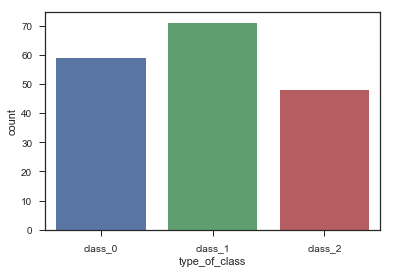

In [14]:
# Distribution of the labels: visualisation of the different classes of wine
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.countplot(x="type_of_class", data=df_with_class);

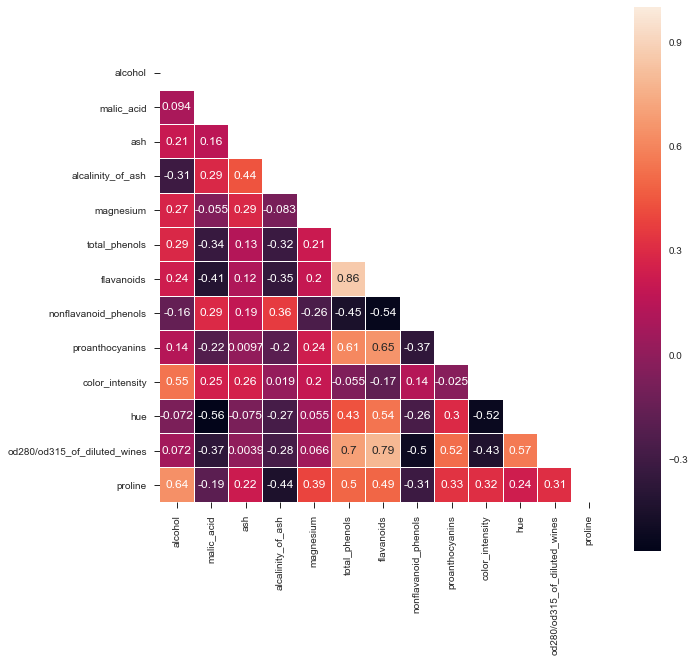

In [15]:
# Plot a correlation matrix to have an idea about the relationship between the features 
import seaborn as sns
correlation = df.corr()

# Plot only a part of the matrix
fig = plt.subplots(figsize=(10,10))
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(correlation, mask=mask, vmax=1,annot=True, square=True, linewidths=.2)

For more clarity, I decided to show only a half of the symmetric correlation matrix. 

The observations are the following:
    
The flavanoids are very correlated with the total_phenols (0.86) and negatively correlated to the nonflavanoid_phenols (-0.54).

The nonflavanoid_phenols are negatively correlated to the total_phenolds (-0.45).

The proanthocyanins are correlated with the total_phenols (0.61) and to the flavanoids (0.65).
    
The proanthocyanins are almost not correlated with the ash nor the color_intensity. The color_intensity itself is not correlated with the total_phenols nor the alcalinity_of_ash.
    
The hue is slightly correlated to the total_phenols (0.43) and flavanoids (0.54) and negatively correlated to the malic_acid (-0.56) and the color_intensity (-0.52).
    
The od280/od315 is above all correlated to the total_phenols (0.7) and the flavanoids (0.79) and is negatively correlated with the nonflavanoid_phenols (-0.5) and to the color_intensity (-0.52).

The proline is correlated to the alcohol (0.64) and negatively correlated to the alcalinity_of_ash (-0.44).

Remarkably the alcohol is in addition to the proline also corelated to the color_intensity(0.55) but not to other features.

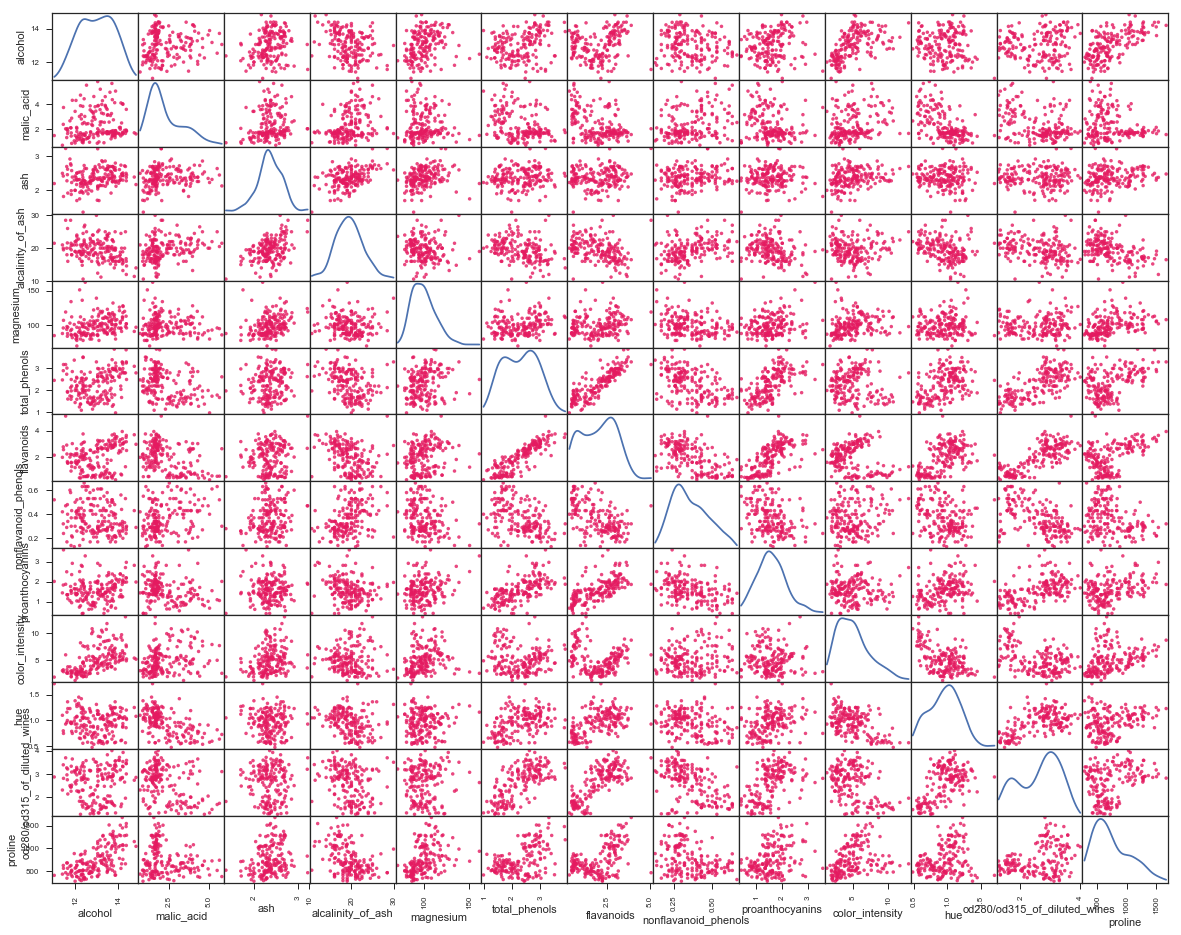

In [16]:
# Let's have a look to see what it looks like graphically
from pandas.plotting import scatter_matrix
columns = wine.feature_names
scatter_matrix(df[columns], color='#e41a60', alpha=0.8, diagonal='kde', figsize=(20, 16));

What is mostly visible is indeed the fact that the flavanoids are  correlated with the total_phenols (0.86).

Features like the ash, the alclinity_of_ash, the magnesium, the nonflavanoid_phenols or the proanthocyanins
seem to be visually dispersed.

### Scatterplot Matrix Analysis (3.2)

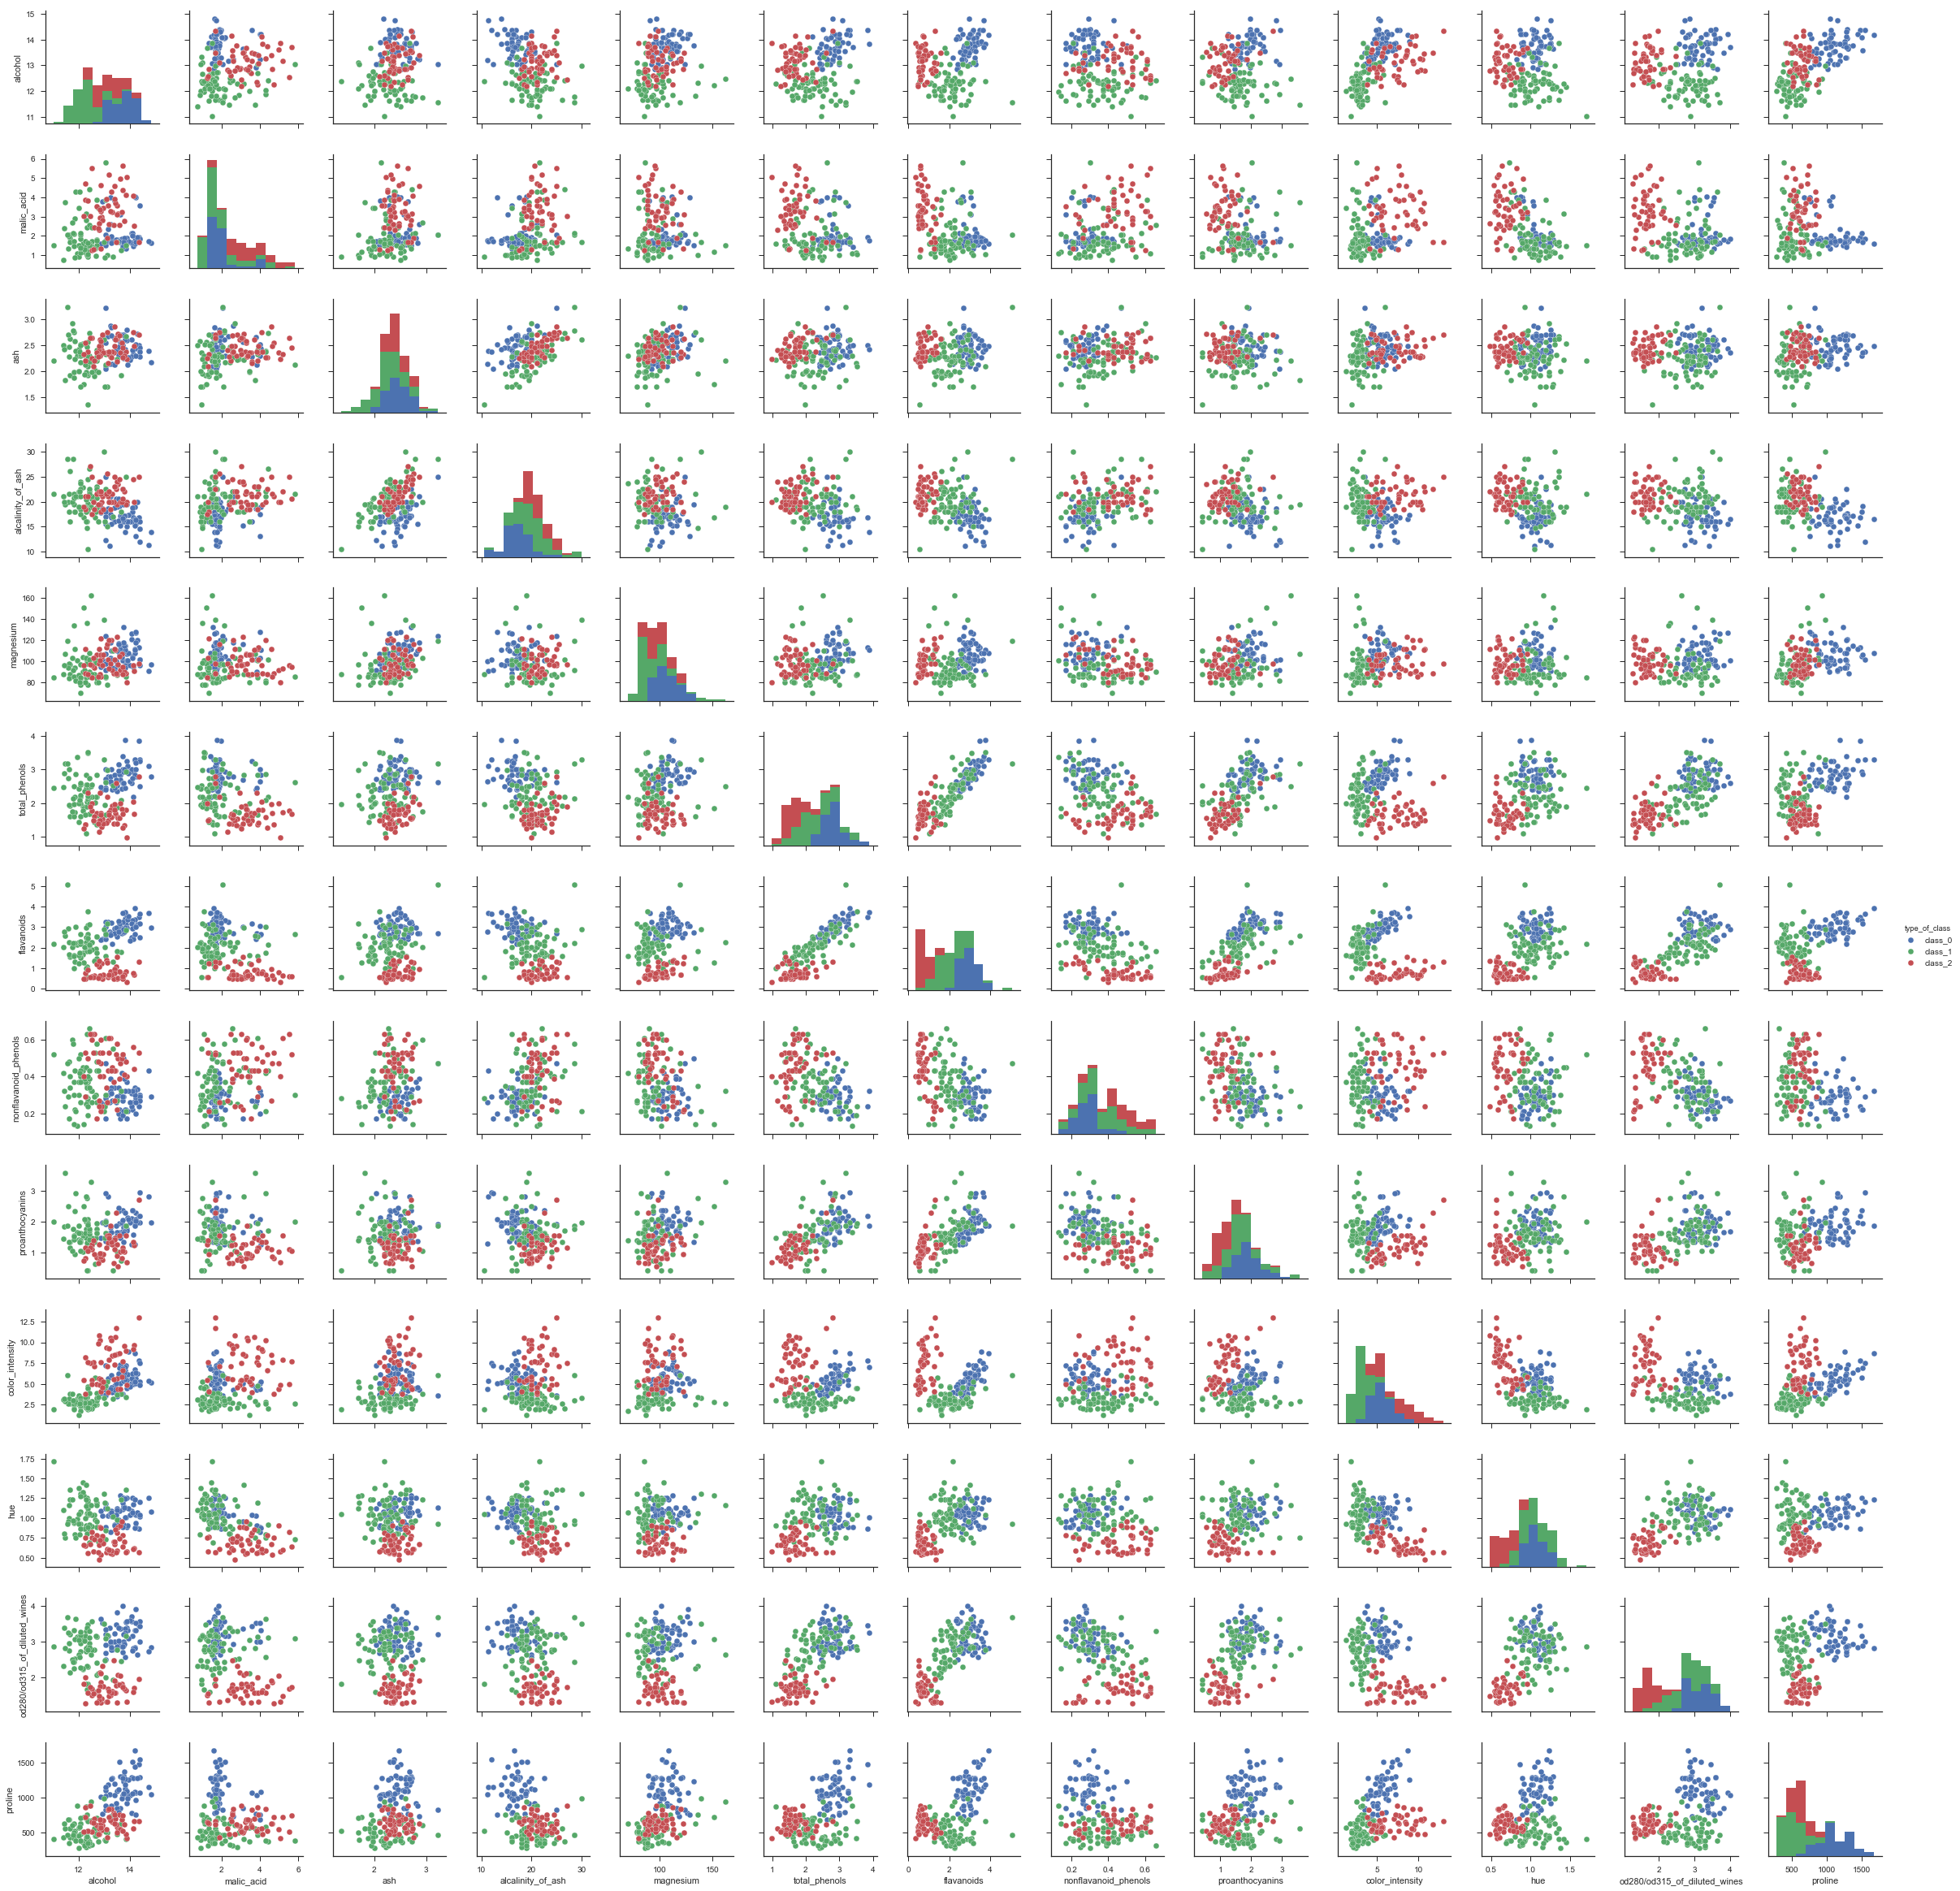

In [17]:
# Let's draw a Scatterplot Matrix to indentify which features could have an interest to classify amongst the class
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_with_class, hue="type_of_class");

### Features visualy showing a clear classification (3.2.1)

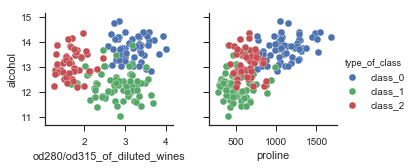

In [18]:
# Use pairplot once more but with less features
sns.set(style="ticks")
sns.pairplot(df_with_class, hue="type_of_class", x_vars=['od280/od315_of_diluted_wines','proline'], y_vars=['alcohol']);

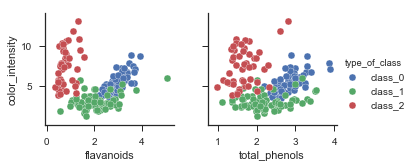

In [19]:
sns.pairplot(df_with_class, hue="type_of_class", x_vars=['flavanoids','total_phenols'], y_vars=['color_intensity']);

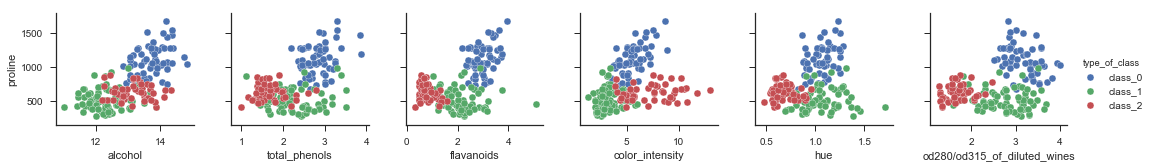

In [20]:
sns.pairplot(df_with_class, hue="type_of_class", x_vars=['alcohol', 'total_phenols','flavanoids','color_intensity','hue','od280/od315_of_diluted_wines'], y_vars=['proline']);

####  First Conclusion

From visual aspect, the following features scattered against one another above seem to be of primary importance: by that I mean that the 3 different groups are more clearly clustered: 

The alcohol against od280/od315 and proline.

The color_intensity against the flavanoids and the total_phenols.

The proline against the alcohol, the total_phenols, the flavanoids, the color_intensity, the hue and the od280/315.

We will use those features to see how the classification models deal with them (above all visually).

Now let's try to indentify cluster for some features thanks to the parrallel_coordinates function in pandas.

### Feature Clusters in the data (3.2.2)

In [21]:
# Normalizing the dataframe
from sklearn import preprocessing
Scaler = preprocessing.StandardScaler()

# Only take the original data in the dataframe
df = pd.DataFrame(X, columns=wine.feature_names)

# Scale the data for a "standardized graph"
np_scaled = Scaler.fit_transform(df)
df_normalized_with_class = pd.DataFrame(np_scaled)

# Concatenate with the labels for visual representation
df_normalized_with_class['type_of_class'] = type_of_class

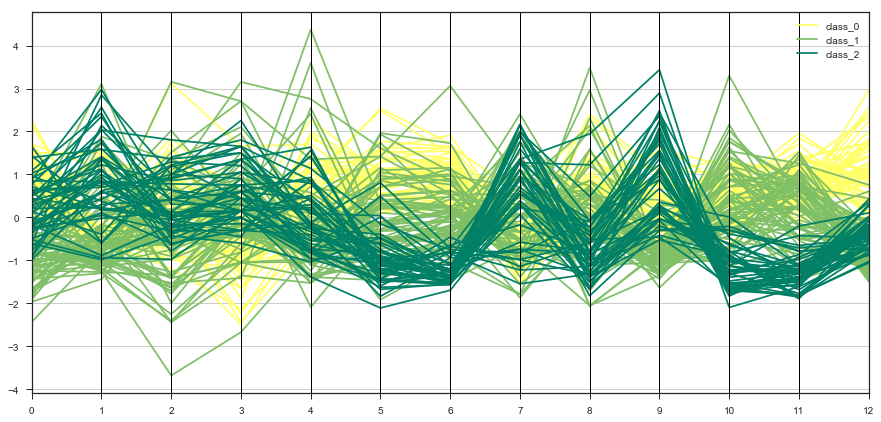

In [22]:
# Import the parallel_cordinates plot from pandas
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,7))
parallel_coordinates(df_normalized_with_class, "type_of_class", colormap='summer_r');

This graph shows the clusters of points for each features in a multivariate setting.

Points are represented as connected line segments (on the x: the feature number).

Each vertical line represents one attribute. One set of connected line segments represents one data point. 

Points that tend to cluster will appear closer together: it is like a profile of each class projected on each feature.

We observe that we have not a clear distinction for feature 2 (ash) nor for the feature 3 (alcalinity of ash). 

On the contrary for the proline (feature 12), the differenciation of the class and the cluster of points in each class worth noticing.

### Another Setting for the Classification Dispersion amongst features (3.2.3)

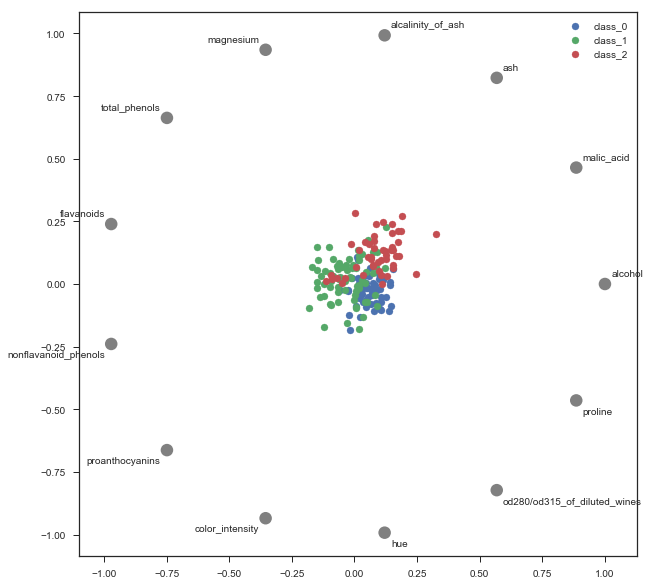

In [23]:
# Examine the dispersion of the 3 classes amongst the features in a multivariate setting
from pandas.plotting import radviz
plt.figure(figsize=(10,10))
radviz(df_with_class, 'type_of_class', color='BGR');

The profiles of the three different classes look quasi-similar on this plot, let's try to drop 'less interesting' features to spread the profiles in a clearer manner.

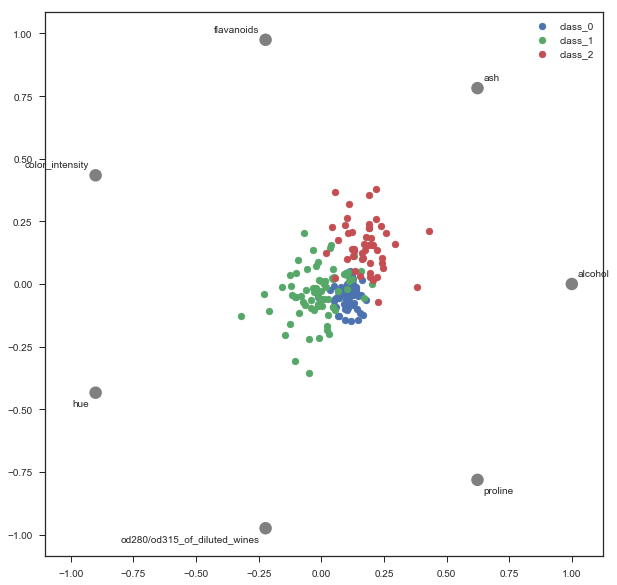

In [24]:
# same thing droping less interesting features for more clarity
plt.figure(figsize=(10,10))
less_interesting_features=['proanthocyanins','nonflavanoid_phenols','magnesium','malic_acid','total_phenols','alcalinity_of_ash']
df_with_class_drop = df_with_class.drop(less_interesting_features, axis=1)
radviz(df_with_class_drop, 'type_of_class',color='BGR');

#### Conclustion

This setting is a simple spring tension minimization visualization of equally spaced point on a unit circle, each point representing a single attribute. 

Each sample in the data set is attached to each of these points by a spring, the stiffness of which is proportional to the numerical value of that attribute (they are normalized to unit interval).

https://cran.r-project.org/web/packages/Radviz/vignettes/single_cell_projections.html

We can therefore deduct: 

That class 0, has a rather equilibrated profile (even more after the reduction of the number of features) and show attraction to od280/315, proline and alcohol.

Class 1 and 2 are more spreaded (less clusterd) profiles amongst the feature. 

Class 1 has a profile orientated towards od280/315, flavanoids, color_intensity and hue.

Class 2 has a profile more orientated towards alcohol, ash and the flavanoids.

### Numerical importance of some features (3.2.4)

### Extra Tree Classifier Ranking (3.2.4.1)

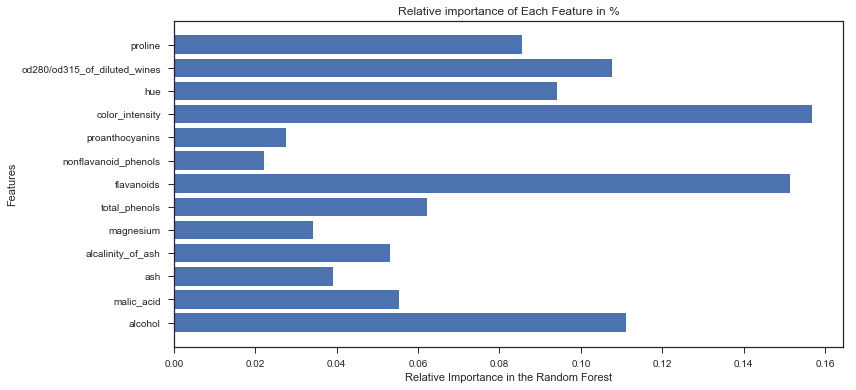

In [25]:
# Display the importance of some features using the Extra Tree Classifier 
# (I will test if other classification methods if they permit the RFE)
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to ALL the data
clf = ExtraTreesClassifier()
clf.fit(wine.data, wine.target)

# display the relative importance of each attribute
importance_list=clf.feature_importances_

# plot the bar chart 
plt.figure(figsize=(12,6))
y_pos = np.arange(len(wine.feature_names))
plt.barh(y_pos,importance_list,align='center')
plt.yticks(range(len(wine.feature_names)),wine.feature_names)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature in %');

This result is quite reassuring, graphically, from what I said above the interesting features were indeed: 

The proline, the alcohol, the od280/od315, the color_intensity and the flavanoids.

NB: the classification is not absolute and it must me remembered. It is just a ranking accordding to the Extra Tree Classifier. Different models will provide different classifications.

 ### Extension : Recursive Feature Elimination Based on the Logistic Regression (3.2.4.2)

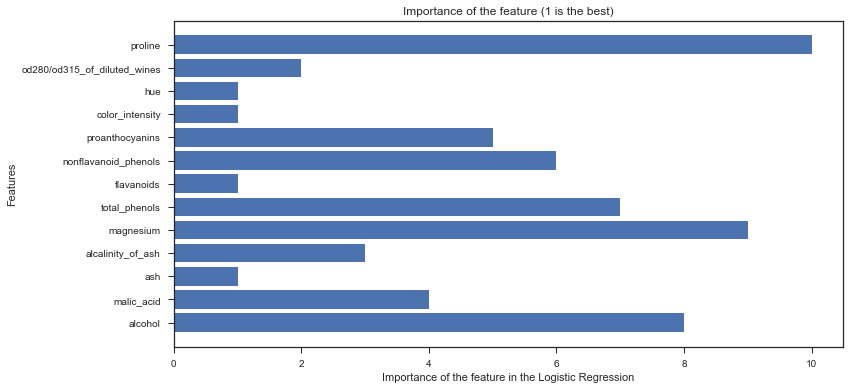

In [26]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Select the Logistic Regression as being the model to use
clf = LogisticRegression()

# Create the RFE model and select 4 attributes
selection = RFE(clf, 4, step=1)

# Let's normalise this time, and check if there is a difference
selection = selection.fit(wine.data, y)
selection.ranking_

# Plot the results
plt.figure(figsize=(12,6))
y_pos = np.arange(len(wine.feature_names))
plt.barh(y_pos,selection.ranking_)
plt.yticks(range(len(wine.feature_names)),wine.feature_names)
plt.xlabel('Importance of the feature in the Logistic Regression')
plt.ylabel('Features')
plt.title('Importance of the feature (1 is the best)');

Using the Recursive Feature Elimination (4 feature selection) with the Logistic Regression as a model, the most important features seem to be indeed the proline and the alcohol I found earlier.

However, I missed the magnesium and the total_phenols.

Theses are: hue, color_intensity, flavanoids and ash

## Feature standardization (4)

In [27]:
# Standardize and preprocessing the data 
from sklearn.preprocessing import StandardScaler
X = wine.data
X = StandardScaler().fit_transform(X)
df = pd.DataFrame(X, columns=wine.feature_names)

In [28]:
# Check if it looks ok
df.head()

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051                      1.113449  0.965242  
2         0.269020  0.318304                      0.788587  1.395148  
3         1.186068 -0.427544                      1.184071  2.334574  
4        -0.319276  0.362177                      0.449601 -0.037874

With this type of scaling, the mean will be 0 for each feature and the standard deviation is the unity.
This StandardScaler approach is less affected by outliers.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


There is not any categorical data so we continue.

## Choosing metrics for model evaluation (5)

In [30]:
# Definition of function to train and provide some metrics to evaluate models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

### Model Evaluation Function: Metrics Utilization (5.1)

In [31]:
def display_model_evaluation(clf):
    
    # Evaluate the accuracy in and out-of-sample
    print('')
    print('Metrics & Accuracy Evaluation:', clf)
    print('')
    
    # Fit the model with the in sample data
    clf.fit(X_train, y_train)
    
    # Issue a prediction with the training set
    y_pred= clf.predict(X_train)
    print('')
    print ("Average Precision on training set:",precision_score(y_train, y_pred, average='weighted'))
    print ("Average Recall on training set:",recall_score(y_train, y_pred, average='weighted'))
    print ("Average F1 Score on training set:",f1_score(y_train, y_pred, average='weighted'))
    print('') 
    print("Root Mean Squared Error (RMSE):",np.sqrt(mean_squared_error(y_train, y_pred)))
    print("Coefficient of determination (R-squared):",r2_score(y_train, y_pred))
    print("Mean Absolute Error (MAE):",mean_absolute_error(y_train, y_pred))
    print('')
    print('================================================')
    
    # Issue a prediction with the testing 
    y_pred= clf.predict(X_test)
    print('')
    print ("Average Precision on testing set:",precision_score(y_test, y_pred, average='weighted'))
    print ("Average Recall on testing set:",recall_score(y_test, y_pred, average='weighted'))
    print ("Average F1 Score on testing set:",f1_score(y_test, y_pred, average='weighted'))
    print('')
    print("Root Mean Squared Error (RMSE):",np.sqrt(mean_squared_error(y_test, y_pred)))
    print("Coefficient of determination (R-squared):",r2_score(y_test, y_pred))
    print("Mean Absolute Error (MAE):",mean_absolute_error(y_test, y_pred))
    print('')
    
    # Provide Classification Report
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))

### New Confusion Matrix Function (5.2)

Imported from : http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [32]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Function to display the confusion matrices more quickly (5.3)

In [33]:
def display_confusion_matrices(y_test,y_pred):
    
    # Define the figure 
    plt.figure(figsize=(14,5))
    
    # Display the confusion Matrix 
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Plot non-normalized confusion matrix
    plt.subplot(1,2,1)
    plt.tight_layout()
    plot_confusion_matrix(confusion_mat, classes=wine.target_names, title='Confusion matrix, without normalization');
    print('')
    
    # Plot normalized confusion matrix
    plt.subplot(1,2,2)
    plt.tight_layout()
    plot_confusion_matrix(confusion_mat, classes=wine.target_names, normalize=True, title='Normalized confusion matrix');

## Train Test Split and Classification models (6 & 7)

### Train Test Split (6.1)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state = 999)

print('Shape of the training set', X_train.shape)
print('Shape of the testing set', X_test.shape)
print('Shape of the labels for the training set', y_train.shape)
print('Shape of the lasbes for the testing set', y_test.shape)

Shape of the training set (119, 13)
Shape of the testing set (59, 13)
Shape of the labels for the training set (119,)
Shape of the lasbes for the testing set (59,)


Shapes are looking good we can continue!

### Logistic Regression (6.2)

In [35]:
# Import the Logisitic Regression for our first classification
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

### All features with Logisitic Regression (6.2.1)

In [36]:
# Fit the model to the training data
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
# Issue prediction
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2])

In [38]:
y_test

array([0, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2])

In [39]:
# Display the metrics thanks to the function we define earlier
display_model_evaluation(clf)


Metrics & Accuracy Evaluation: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Average Precision on training set: 1.0
Average Recall on training set: 1.0
Average F1 Score on training set: 1.0

Root Mean Squared Error (RMSE): 0.0
Coefficient of determination (R-squared): 1.0
Mean Absolute Error (MAE): 0.0


Average Precision on testing set: 0.9681194511702986
Average Recall on testing set: 0.9661016949152542
Average F1 Score on testing set: 0.9659442989910124

Root Mean Squared Error (RMSE): 0.18411492357966466
Coefficient of determination (R-squared): 0.9378292939936775
Mean Absolute Error (MAE): 0.03389830508474576

Classification Report:
             precision    recall  f1-score   support

          0       0.95      1.00      0.98        20
          1       1.00   

In [40]:
y_test

array([0, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2])

Confusion matrix, without normalization
[[20  0  0]
 [ 1 24  1]
 [ 0  0 13]]

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.03846154 0.92307692 0.03846154]
 [0.         0.         1.        ]]


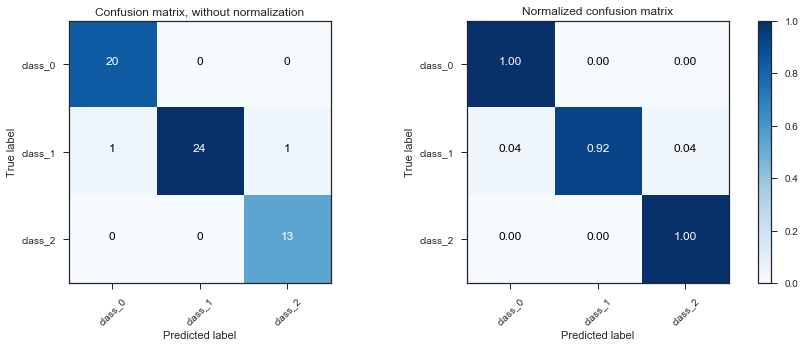

In [41]:
# Display the confusion Matrix on the testing set
display_confusion_matrices(y_test,y_pred)

#### Conclusion

The Logistic Regression model appears to be quite efficient and powerful on our dataset when fitted with the training data to issue prediction based on the testing data.

Indeed, with a F1 score near 96.6% and a determination coefficient of 93.8% on the testing set, this model seems to be hard to beat. It has a recall of 1, 0.92 and 1 respectively for class 0, 1 and 2. In this precise example (random state 999 for the spliting only two class 1 have been incorrectly classified: one in class 0 and the other in class 2).

One thing to notice, is that the logisitc regression completely fits the in-sample (training) data with a R² of 1.

Let's examine whether the logisitc is as powerful if we fit the model with only two 'interesting' features.

### Model Evaluation only with the features alcohol and od280/od315 (6.2.2)

In [42]:
# Features Selection
featureX = 'od280/od315_of_diluted_wines'
featureY = 'alcohol'
X = df[[featureX,featureY]]
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state = 999)

In [43]:
# Selection of the model and fitting
clf = LogisticRegression()
# This time, fit the model using all the available data
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

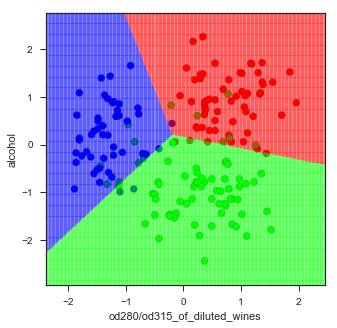

In [45]:
import HelpfulFunctions as hp
# Plot the results
plt.figure(figsize=(5,5))
hp.featureSpacePlot(featureX,featureY,X,y,clf,plt)

In [46]:
# Display the model evaluation with 2 features
display_model_evaluation(clf)


Metrics & Accuracy Evaluation: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Average Precision on training set: 0.9037790791992472
Average Recall on training set: 0.8991596638655462
Average F1 Score on training set: 0.8967305079213257

Root Mean Squared Error (RMSE): 0.3175536744149779
Coefficient of determination (R-squared): 0.8375426621160409
Mean Absolute Error (MAE): 0.10084033613445378


Average Precision on testing set: 0.8782742681047765
Average Recall on testing set: 0.8813559322033898
Average F1 Score on testing set: 0.8779257465698144

Root Mean Squared Error (RMSE): 0.41169348479630913
Coefficient of determination (R-squared): 0.6891464699683878
Mean Absolute Error (MAE): 0.13559322033898305

Classification Report:
             precision    recall  f1-scor

Confusion matrix, without normalization
[[20  0  0]
 [ 1 23  2]
 [ 1  3  9]]

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.03846154 0.88461538 0.07692308]
 [0.07692308 0.23076923 0.69230769]]


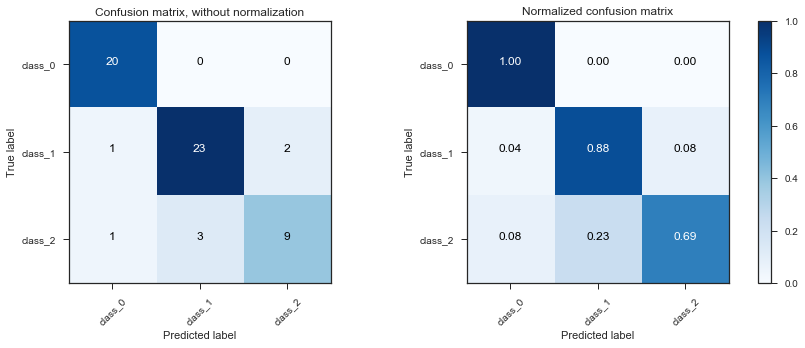

In [47]:
# Display the confusion matrices
y_pred = clf.predict(X_test)
display_confusion_matrices(y_test,y_pred)

#### Conclusion

When selecting the alcohol and the od280/od315 the model seems less attractive and less robust with the testing set.

The model does not fit completely the in sample data (which was pretty expected given it only as a 2 features to classify almost 90%).

The model allows to recognize the class 0 without making errors (recall of 1) and the errors made on class 1 are quite comparable to the one made using all the features with a recall of 0.88.

However the errors made trying to classify class 2 are quite important with a recall of 0.69.

The 2 features selection model is not that bad (F1 Score: 88% and R² of 69%) but we are far from the results obtaining using all the features. 

### Other Feature Selection and Space Visualization (6.2.3)

In [48]:
import HelpfulFunctions as hp
def model_features_plotting(featureX,featureY):
    X = df[[featureX,featureY]]
    y = wine.target
    
    # NB: IT WILL ALSO FIT THE MODEL (SO IT IS NOT NEEDED EARLIER ON)
    clf.fit(X, y)
    
    # Display the graph
    hp.featureSpacePlot(featureX,featureY,X,y,clf,plt)

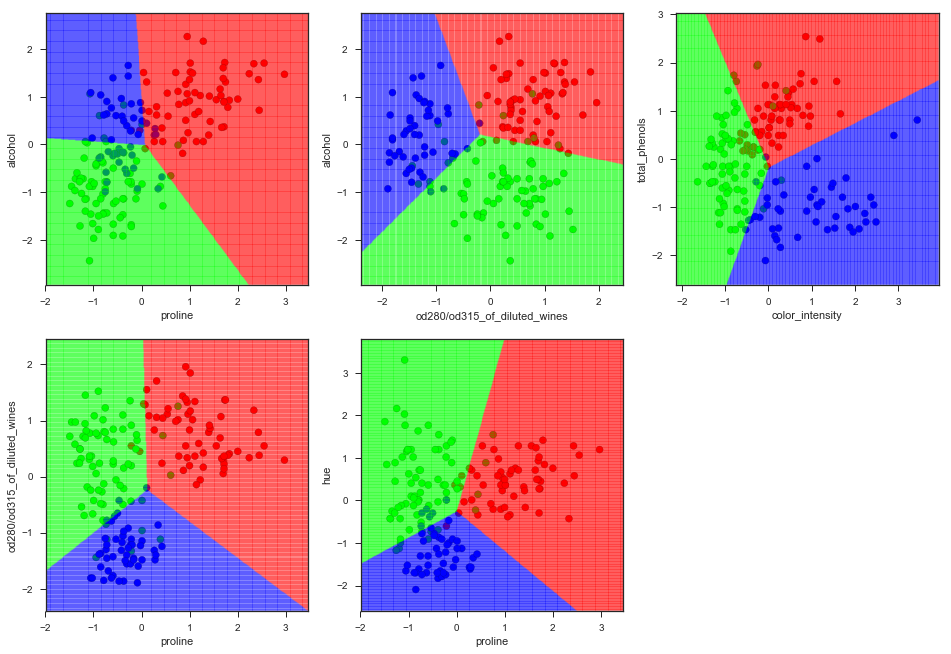

In [49]:
# Plot the results
plt.figure(figsize=(16,11))
plt.subplot(2,3,1)
model_features_plotting('proline','alcohol')
plt.subplot(2,3,2)
model_features_plotting('od280/od315_of_diluted_wines','alcohol')
plt.subplot(2,3,3)
model_features_plotting('color_intensity','total_phenols')
plt.subplot(2,3,4)
model_features_plotting('proline','od280/od315_of_diluted_wines')
plt.subplot(2,3,5)
model_features_plotting('proline','hue')

### KNN : K Nearest Neighbors K Nearest Neighbours (6.3)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from graphviz import Source

### Multiclass Classification : the impact of K (6.3.1)

Before fitting the model with all the training data with all the features, let's try to visualize the impact of the nearest neighbors K.

We will use an inverse distance weight as opposed to a uniform one for those graphs.
We will afterwards study if the best distance one best the best uniform one (it is indeed the case as we shall see).

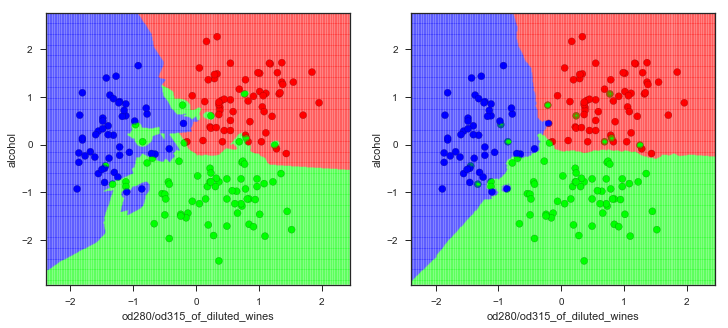

In [51]:
# Use all the data to fit
K=3
clf = KNeighborsClassifier(K,'distance')

# Plot the result
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
# The below function also fits the model...
model_features_plotting('od280/od315_of_diluted_wines','alcohol')

# Same thing but for K=20
K=20
clf = KNeighborsClassifier(K,'distance')
plt.subplot(1,2,2)
model_features_plotting('od280/od315_of_diluted_wines','alcohol')

Graphically it is obvious that increasing K (from 3 to 20) in some way tend to extend the area of each class uniformally to reach a point of their class. In this case (with K=20), it seems to look like (to some extent) to the logisitic regression we had earlier.

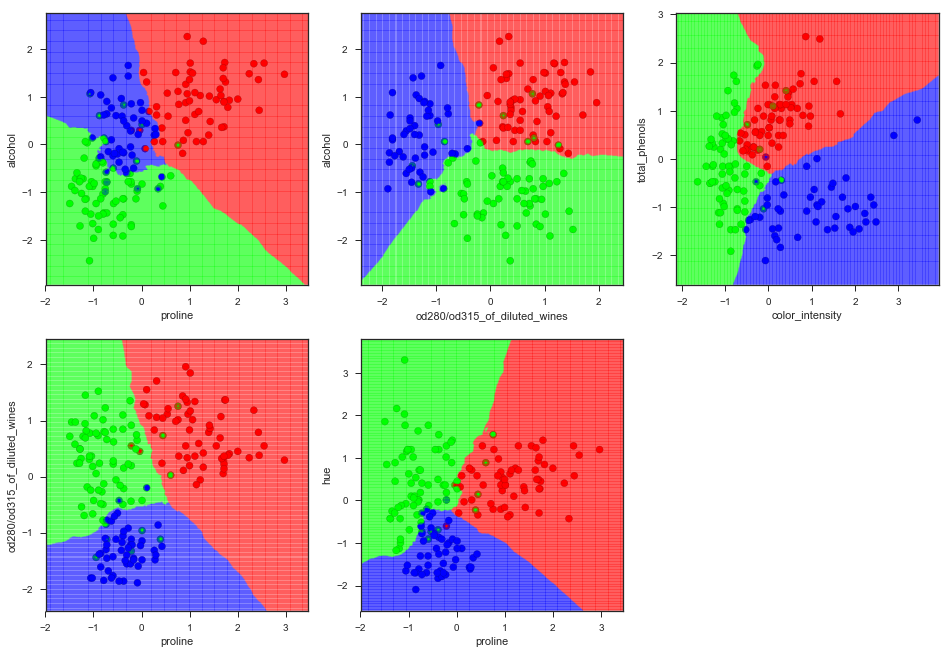

In [52]:
# Let's use the same set as before (the one for logistic regression) for K = 20
plt.figure(figsize=(16,11))
plt.subplot(2,3,1)
model_features_plotting('proline','alcohol')
plt.subplot(2,3,2)
model_features_plotting('od280/od315_of_diluted_wines','alcohol')
plt.subplot(2,3,3)
model_features_plotting('color_intensity','total_phenols')
plt.subplot(2,3,4)
model_features_plotting('proline','od280/od315_of_diluted_wines')
plt.subplot(2,3,5)
model_features_plotting('proline','hue')

The graphical results seem impressive: look for instance at the total_phenols vs color_intensity one!

### What is the optimal value of K? (6.3.2)

In [53]:
# Reinitialise the problem
X = wine.data

# Standardize the data
X = StandardScaler().fit_transform(X)
df = pd.DataFrame(X, columns=wine.feature_names)
y = wine.target

# Train Test Split ... 
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state = 999)

optimal_f1 = []
for n in range(1, 100):
    clf = KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    optimal_f1.append(f1_score(y_test, y_pred, average='weighted'))
    optimal_k = (optimal_f1.index(max(optimal_f1))) +1
print("The optimal number of neighbors using uniform metric is " + str(optimal_k), 'and the best f1 score is ', max(optimal_f1))

The optimal number of neighbors using uniform metric is 43 and the best f1 score is  0.9662308313155771


Let's see if the "distance" parameter in KNN could improve the f1 score.

In [54]:
# Reinitialise the problem
X = wine.data

# Standardize the data
X = StandardScaler().fit_transform(X)
df = pd.DataFrame(X, columns=wine.feature_names)
y = wine.target

# Train Test Split ... 
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state = 999)

optimal_f1 = []
for n in range(1, 100):
    clf = KNeighborsClassifier(n, 'distance')
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    optimal_f1.append(f1_score(y_test, y_pred, average='weighted'))
    optimal_k = (optimal_f1.index(max(optimal_f1))) +1
print("The optimal number of neighbors using the distance metric is " + str(optimal_k), 'and the best f1 score is ', max(optimal_f1))

The optimal number of neighbors using the distance metric is 95 and the best f1 score is  0.9830913762776711


Let's therefore continue using the distance parameter to obtain the best model possible.

### Fitting using all features for different K (6.3.3)

In [55]:
# Reinitialise the problem
df = pd.DataFrame(wine.data, columns=wine.feature_names)
X = df

# Standardize the data
X = StandardScaler().fit_transform(X)
y = wine.target

# Train Test Split ... 
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state = 999)

K_set=[3,20,95]

for i in range(1,len(K_set)+1):
    # Launch or different values of K
    K=K_set[i-1]
    clf = KNeighborsClassifier(K,'distance')
    
    # Fit the model using all the data
    clf.fit(X_train, y_train)
    
    # Display model evalution
    display_model_evaluation(clf)
    


Metrics & Accuracy Evaluation: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')


Average Precision on training set: 1.0
Average Recall on training set: 1.0
Average F1 Score on training set: 1.0

Root Mean Squared Error (RMSE): 0.0
Coefficient of determination (R-squared): 1.0
Mean Absolute Error (MAE): 0.0


Average Precision on testing set: 0.9425443906376111
Average Recall on testing set: 0.9322033898305084
Average F1 Score on testing set: 0.9322152689674179

Root Mean Squared Error (RMSE): 0.2603778219616477
Coefficient of determination (R-squared): 0.8756585879873551
Mean Absolute Error (MAE): 0.06779661016949153

Classification Report:
             precision    recall  f1-score   support

          0       0.95      1.00      0.98        20
          1       1.00      0.85      0.92        26
          2       0.81      1.00      0.90        13

avg / total       0

Confusion matrix, without normalization
[[20  0  0]
 [ 1 22  3]
 [ 0  0 13]]

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.03846154 0.84615385 0.11538462]
 [0.         0.         1.        ]]
Confusion matrix, without normalization
[[20  0  0]
 [ 2 23  1]
 [ 0  0 13]]

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.07692308 0.88461538 0.03846154]
 [0.         0.         1.        ]]
Confusion matrix, without normalization
[[20  0  0]
 [ 1 25  0]
 [ 0  0 13]]

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.03846154 0.96153846 0.        ]
 [0.         0.         1.        ]]


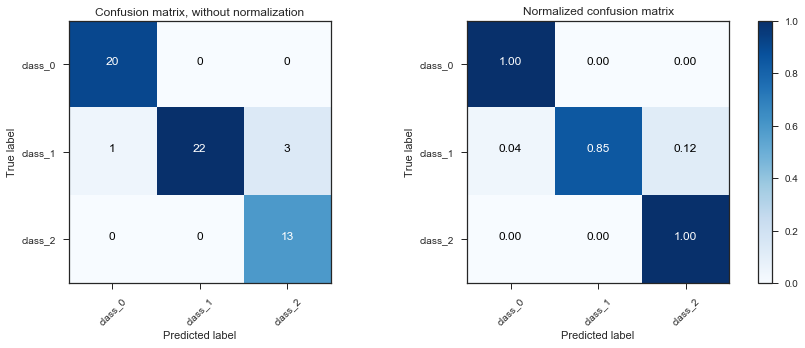

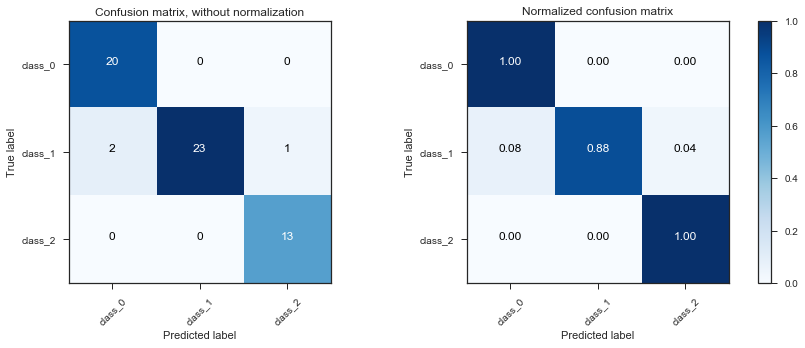

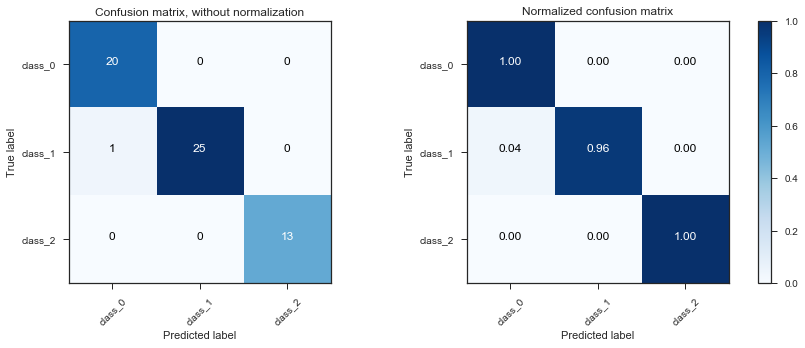

In [56]:
for i in range(1,len(K_set)+1):
    # Launch or different values of K
    K=K_set[i-1]
    clf = KNeighborsClassifier(K,'distance')
    
    # Fit the model using all the data
    clf.fit(X_train, y_train)
    
    # Display the confusion matrices
    # Issue a prediction 
    y_pred = clf.predict(X_test)
    display_confusion_matrices(y_test,y_pred)

#### Conclusion: 

I have chosen my last K to be the optimal (distance) K, with K=95.

As K increases, the precision, the recall and therefore F1 Score of our model on the testing set increases (F1 score from 93% for K=3 and then 95% for K=20 and finally near 98% for K=95).

With K=95, the average recall is of 98%, which even better to the logisitic regression model. The recall are respectively of 1, 0.96 and 1 for the class 0, 1 and 2 (one class 1 falsely attributed to a class 0). The R² is 96.90% the same with the regression classification model on the testing set.

For each value of K, the model completely fits the training data in sample (R² of 1), 100% accurate.

Thefore with K=95 and the distance parameter, the K nearest neighbors model  beats the logistic regression one and becomes the best model so far.

### Decision Tree Classifier (6.4)

### Decision Tree Classifier as a model (6.4.1)

In [57]:
# Import the necessary libaries
from sklearn.tree import DecisionTreeClassifier
from os import system
import graphviz

We could have tried to look after the optimal depth for the Decision Tree Classifier but there is no point in trying since the maximum will change after each try.

There is an example:

In [58]:
# Reinitialise the problem
X = wine.data

# Standardize the data
X = StandardScaler().fit_transform(X)
df = pd.DataFrame(X, columns=wine.feature_names)
y = wine.target

# Train Test Split ... 
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state = 999)

depth_list = []
for j in range(1, 20):
    clf = DecisionTreeClassifier(max_depth = j)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    depth_list.append(f1_score(y_test, y_pred, average='weighted'));
    optimal_depth = (depth_list.index(max(depth_list))) +1;
print("The optimal depth is " + str(optimal_depth), 'and the best f1 score is ', max(depth_list));

The optimal depth is 7 and the best f1 score is  0.9487169632448083


/Users/Jeremymeyer/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Let's therefore analyse the robustness of this model leaving the default parameters.

In [59]:
# Reinitialise the problem
X = wine.data

# Standardize the data
X = StandardScaler().fit_transform(X)
df = pd.DataFrame(X, columns=wine.feature_names)
y = wine.target

# Train Test Split ... 
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state = 999)

# Train the DecisionTreeClassifier on the Training data
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [60]:
# Evaluate the accuracy in and out-of-sample
display_model_evaluation(clf)


Metrics & Accuracy Evaluation: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


Average Precision on training set: 1.0
Average Recall on training set: 1.0
Average F1 Score on training set: 1.0

Root Mean Squared Error (RMSE): 0.0
Coefficient of determination (R-squared): 1.0
Mean Absolute Error (MAE): 0.0


Average Precision on testing set: 0.9278697996918336
Average Recall on testing set: 0.9152542372881356
Average F1 Score on testing set: 0.9141836273661634

Root Mean Squared Error (RMSE): 0.291111254869791
Coefficient of determination (R-squared): 0.8445732349841939
Mean Absolute Error (MAE): 0.0847457627118644

Classification Report:
             precision    recall  f1-score   suppo

Confusion matrix, without normalization
[[20  0  0]
 [ 2 21  3]
 [ 0  0 13]]

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.07692308 0.80769231 0.11538462]
 [0.         0.         1.        ]]


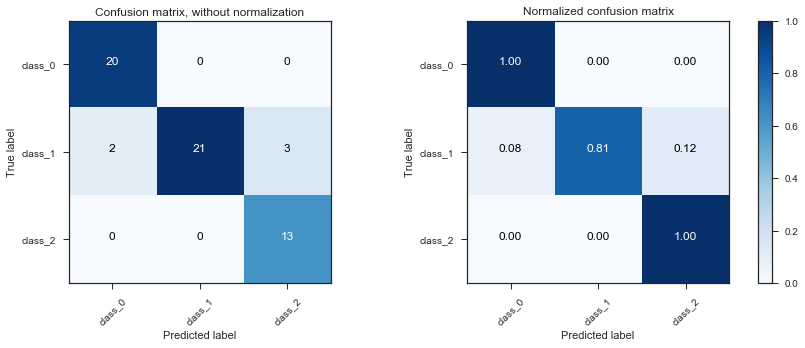

In [61]:
# Display the confusion matrices
# Issue a prediction 
y_pred = clf.predict(X_test)
display_confusion_matrices(y_test,y_pred)

#### Conclusion: 

The Decision Tree model looks a little bit less promising than the Logistic Regression and than the KNN (even with a high K).

The model fits like the two others the in sample (training) data perfectly.

It is less accurate overall on the testing set with a R² of about 78% to 90%, and a F1 score of near 95% at best and 88/87% at worst: so in most of the cases tried it has a lower F1 Score than the best models we have seen until now.

The metrics vary if you relaunch the script, and especially the recall concerning class 1 type.

Seems to be (for now) the worst model to use!

In [69]:
from IPython.display import SVG
from graphviz import Source
from sklearn import tree

In [70]:
# Drawing the Decision Tree
from IPython.display import SVG
graph = Source(export_graphviz(clf, out_file=None))
SVG(graph.pipe(format='svg'))

NameError: name 'export_graphviz' is not defined

### Multiclass Classification Decision Boundary: od280/od315 vs alcohol (6.4.2)

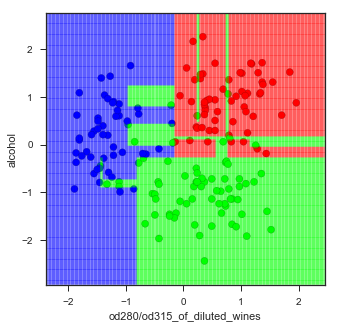

In [71]:
# Use all the data to fit
clf = DecisionTreeClassifier()
    
# Plot the results
plt.figure(figsize=(5,5))
model_features_plotting('od280/od315_of_diluted_wines','alcohol')

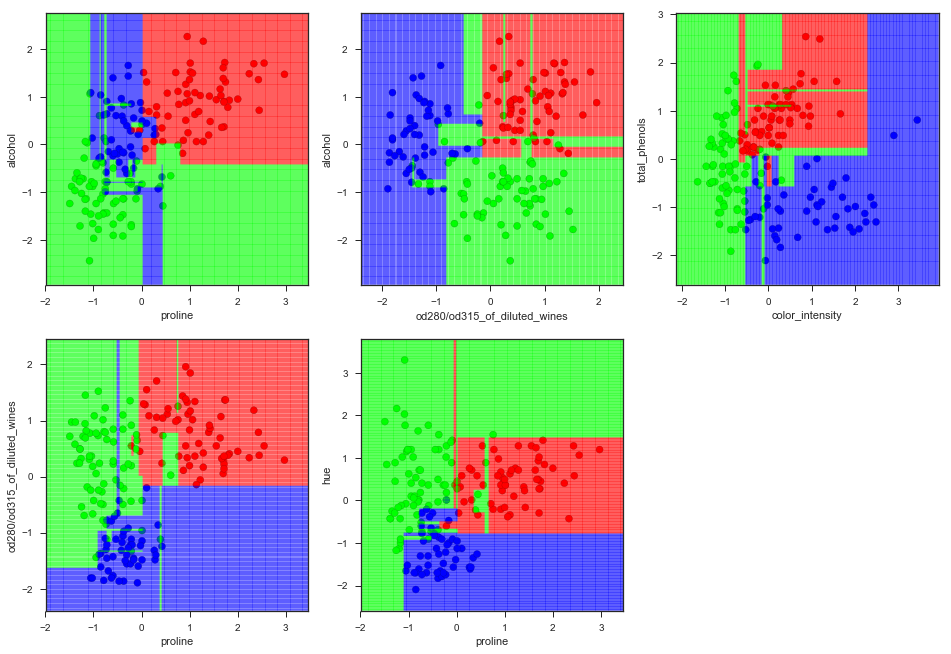

In [72]:
# Let's use the same set as before (the one for logistic regression and K nearest neighbors)
plt.figure(figsize=(16,11))
plt.subplot(2,3,1)
model_features_plotting('proline','alcohol')
plt.subplot(2,3,2)
model_features_plotting('od280/od315_of_diluted_wines','alcohol')
plt.subplot(2,3,3)
model_features_plotting('color_intensity','total_phenols')
plt.subplot(2,3,4)
model_features_plotting('proline','od280/od315_of_diluted_wines')
plt.subplot(2,3,5)
model_features_plotting('proline','hue')

### Naive Bayes (6.5)

### Decision Space Visualisation (6.5.1)

In [73]:
from sklearn.naive_bayes import GaussianNB

# Call the Naive Bayes model
clf = GaussianNB()
clf.fit(X, y)
    

GaussianNB(priors=None)

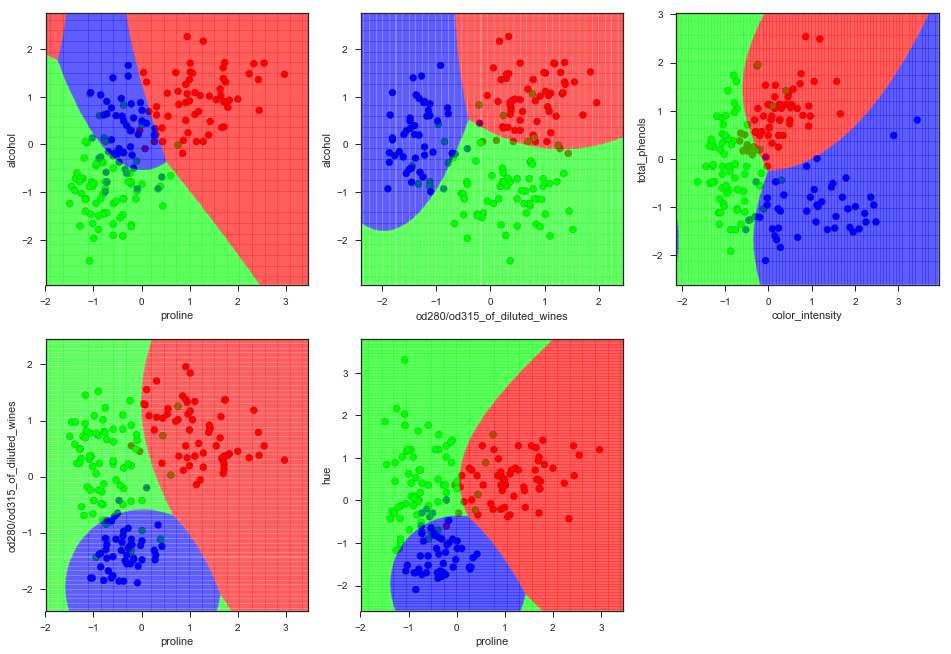

In [74]:
# Let's use the same set as before (the one for logistic regression, K nearest neighbors and Decision Tree)
plt.figure(figsize=(16,11))
plt.subplot(2,3,1)
model_features_plotting('proline','alcohol')
plt.subplot(2,3,2)
model_features_plotting('od280/od315_of_diluted_wines','alcohol')
plt.subplot(2,3,3)
model_features_plotting('color_intensity','total_phenols')
plt.subplot(2,3,4)
model_features_plotting('proline','od280/od315_of_diluted_wines')
plt.subplot(2,3,5)
model_features_plotting('proline','hue')

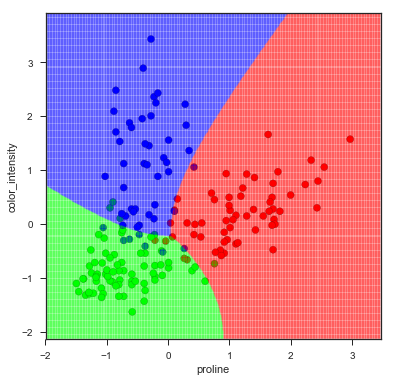

In [75]:
plt.figure(figsize=(6,6))

# Fit the model
clf = GaussianNB()
clf.fit(X, y)

# Show a visualisation
model_features_plotting('proline','color_intensity')

The classification using those two features: color_intensity and proline seems to be very efficient graphically!!

### Naive Bayes as a model (fitted with all the training data) (6.5.2)

In [76]:
# Reinitialise the problem
X = wine.data

# Standardize the data
X = StandardScaler().fit_transform(X)
df = pd.DataFrame(X, columns=wine.feature_names)
y = wine.target

# Train Test Split ... 
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state = 999)

# Fit the model with the training data
clf = GaussianNB()
clf = clf.fit(X_train, y_train)

In [77]:
# Display the model evaluation
display_model_evaluation(clf)


Metrics & Accuracy Evaluation: GaussianNB(priors=None)


Average Precision on training set: 0.9753887062071205
Average Recall on training set: 0.9747899159663865
Average F1 Score on training set: 0.9747664704246298

Root Mean Squared Error (RMSE): 0.15877683720748895
Coefficient of determination (R-squared): 0.9593856655290103
Mean Absolute Error (MAE): 0.025210084033613446


Average Precision on testing set: 0.9838579499596449
Average Recall on testing set: 0.9830508474576272
Average F1 Score on testing set: 0.9830913762776711

Root Mean Squared Error (RMSE): 0.13018891098082386
Coefficient of determination (R-squared): 0.9689146469968388
Mean Absolute Error (MAE): 0.01694915254237288

Classification Report:
             precision    recall  f1-score   support

          0       0.95      1.00      0.98        20
          1       1.00      0.96      0.98        26
          2       1.00      1.00      1.00        13

avg / total       0.98      0.98      0.98        59



Confusion matrix, without normalization
[[20  0  0]
 [ 1 25  0]
 [ 0  0 13]]

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.03846154 0.96153846 0.        ]
 [0.         0.         1.        ]]


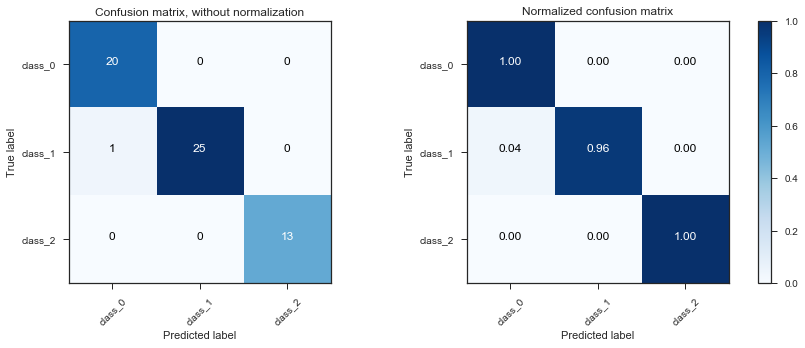

In [78]:
# Display the confusion matrices
# Issue a prediction 
y_pred = clf.predict(X_test)
display_confusion_matrices(y_test,y_pred)

#### Conclusion

The Naive Bayes model appears to be so far the most robust with only 1 error made (a class 1 being indentified as being a class 0).

The model does not perfectly fits the training data with a R² of 95.9% but provide a R² of 96.9% on the testing sample.

Therefore this model does better with on the testing sample than the training sample. This model may not overfit too much the training in-sample data which allows it to commit fewer mistakes. 

It has the best F1 score of 98.3% (recall and precision are almost similiar at 0.98) which ranks it as the best model we used until now with the KNN (95) using distance parameter.

### SVM Classifier (6.6)

For the SVM Classifier, I have chosen to take radial and polynomial kernel, as the data seemed to be difficult to split linearly. (Model evaluation would have been worse).

I will check this assumption on 6.6.4

### Radial Function visualisation (6.6.1)

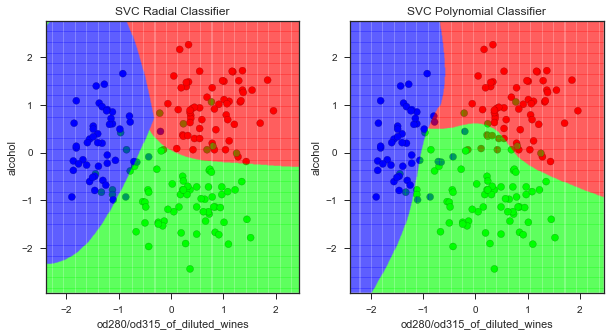

In [79]:
from sklearn.svm import SVC

# Choose the SVM Classifier (Radial) model
clf = SVC(kernel='rbf') 
    
# Plot the results (the fitting is taken care of in the model_features_plotting fonction)
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
ax.set_title("SVC Radial Classifier")
model_features_plotting('od280/od315_of_diluted_wines','alcohol')

# Choose the SVM Classifier (Polynomial) model
clf = SVC(kernel='poly')
    
# Plot the results (the fitting is taken care of in the model_features_plotting fonction)
ax = plt.subplot(1,2,2)
ax.set_title("SVC Polynomial Classifier")
model_features_plotting('od280/od315_of_diluted_wines','alcohol')

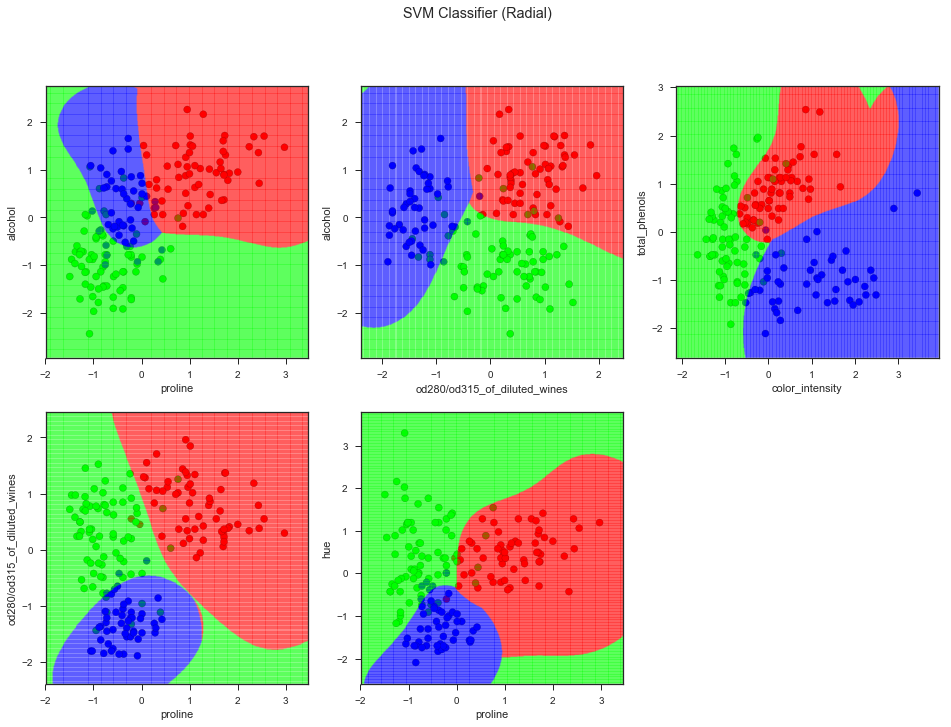

In [80]:
# Let's use the same set as before (the one for logistic regression, K nearest neighbors, Decision Tree and NB)
# Choose the SVM Classifier (Radial) model
clf = SVC(kernel='rbf', degree=3, coef0=1, C=5) 

plt.figure(figsize=(16,11))
plt.suptitle("SVM Classifier (Radial)")
plt.subplot(2,3,1)
model_features_plotting('proline','alcohol')
plt.subplot(2,3,2)
model_features_plotting('od280/od315_of_diluted_wines','alcohol')
plt.subplot(2,3,3)
model_features_plotting('color_intensity','total_phenols')
plt.subplot(2,3,4)
model_features_plotting('proline','od280/od315_of_diluted_wines')
plt.subplot(2,3,5)
model_features_plotting('proline','hue')

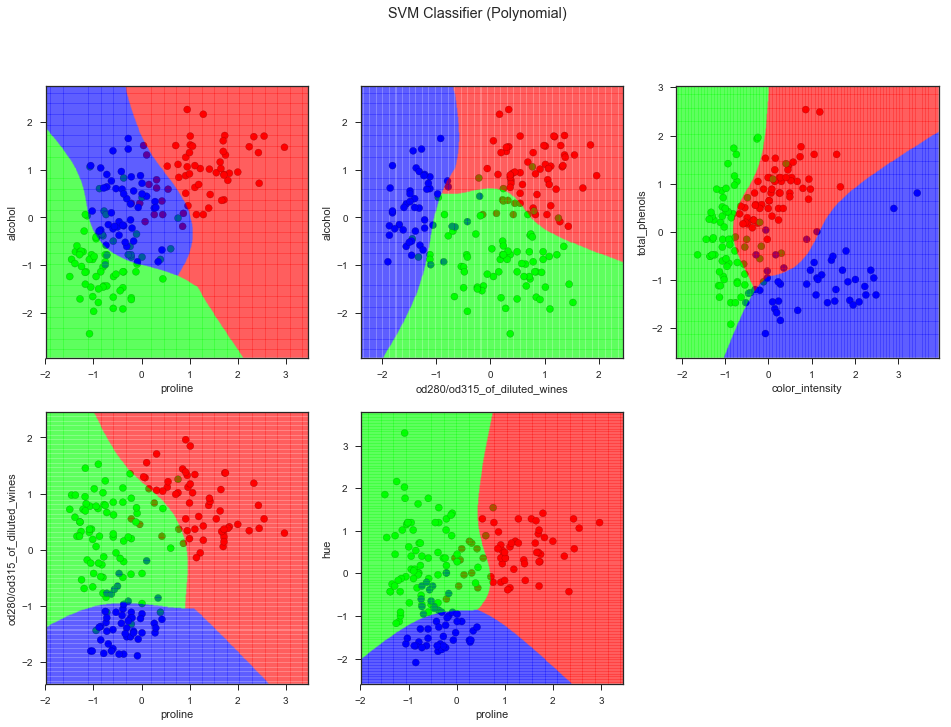

In [81]:
# Let's use the same set as before (the one for logistic regression, K nearest neighbors, Decision Tree and NB)
# Choose the SVM Classifier (Polynomial) model
clf = SVC(kernel="poly")

plt.figure(figsize=(16,11))
plt.suptitle("SVM Classifier (Polynomial)")
plt.subplot(2,3,1)
model_features_plotting('proline','alcohol')
plt.subplot(2,3,2)
model_features_plotting('od280/od315_of_diluted_wines','alcohol')
plt.subplot(2,3,3)
model_features_plotting('color_intensity','total_phenols')
plt.subplot(2,3,4)
model_features_plotting('proline','od280/od315_of_diluted_wines')
plt.subplot(2,3,5)
model_features_plotting('proline','hue')

### SVM (Radial) Classifier as model and evaluation (6.6.2)

In [82]:
# Reinitialise the problem
X = wine.data

# Standardize the data
X = StandardScaler().fit_transform(X)
df = pd.DataFrame(X, columns=wine.feature_names)
y = wine.target

# Train Test Split ... 
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state = 999)

# Fit the SVM model with the training data
clf = SVC(kernel='rbf') 
clf = clf.fit(X_train, y_train)

In [83]:
# Display the model evaluation
display_model_evaluation(clf)


Metrics & Accuracy Evaluation: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Average Precision on training set: 1.0
Average Recall on training set: 1.0
Average F1 Score on training set: 1.0

Root Mean Squared Error (RMSE): 0.0
Coefficient of determination (R-squared): 1.0
Mean Absolute Error (MAE): 0.0


Average Precision on testing set: 1.0
Average Recall on testing set: 1.0
Average F1 Score on testing set: 1.0

Root Mean Squared Error (RMSE): 0.0
Coefficient of determination (R-squared): 1.0
Mean Absolute Error (MAE): 0.0

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        20
          1       1.00      1.00      1.00        26
          2       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        

Confusion matrix, without normalization
[[20  0  0]
 [ 0 26  0]
 [ 0  0 13]]

Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


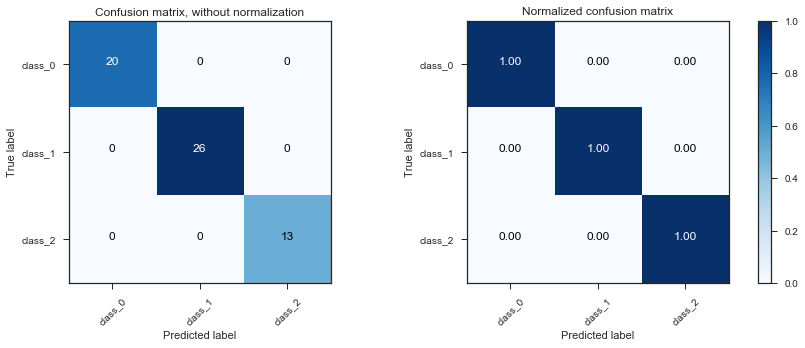

In [84]:
# Display the confusion matrices
# Issue a prediction 
y_pred = clf.predict(X_test)
display_confusion_matrices(y_test,y_pred)

#### Conclusion

The SVM Radial Classifier model outshines the Naive Bayes model and the KNN(95) with distance parameter, achieving  a perfect classification of the type of class on the testing set. 

It has never happened with other models.

The model also perfectly fit the training data in sample (R² of 1, F1 score of 1).

Let's study if it is also the case using a polynomial kernel with the SVM classifier.

NB: the radial kernel also corresponds to the default kernel paramater of SVC()

### SVM (Polynomial) Classifier as model and evaluation (6.6.3)

In [85]:
# Reinitialise the problem
X = wine.data

# Standardize the data
X = StandardScaler().fit_transform(X)
df = pd.DataFrame(X, columns=wine.feature_names)
y = wine.target

# Train Test Split ... 
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state = 999)

# Fit the SVM model with the training data
clf = SVC(kernel='poly') 
clf = clf.fit(X_train, y_train)

In [86]:
# Display the model evaluation
display_model_evaluation(clf)


Metrics & Accuracy Evaluation: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Average Precision on training set: 0.9839084569998212
Average Recall on training set: 0.9831932773109243
Average F1 Score on training set: 0.9831548179912697

Root Mean Squared Error (RMSE): 0.12964074471043288
Coefficient of determination (R-squared): 0.9729237770193402
Mean Absolute Error (MAE): 0.01680672268907563


Average Precision on testing set: 0.9661016949152542
Average Recall on testing set: 0.9661016949152542
Average F1 Score on testing set: 0.9661016949152542

Root Mean Squared Error (RMSE): 0.18411492357966466
Coefficient of determination (R-squared): 0.9378292939936775
Mean Absolute Error (MAE): 0.03389830508474576

Classification Report:
             precision    recall  f1-score   support

          0       0.95   

Confusion matrix, without normalization
[[19  1  0]
 [ 1 25  0]
 [ 0  0 13]]

Normalized confusion matrix
[[0.95       0.05       0.        ]
 [0.03846154 0.96153846 0.        ]
 [0.         0.         1.        ]]


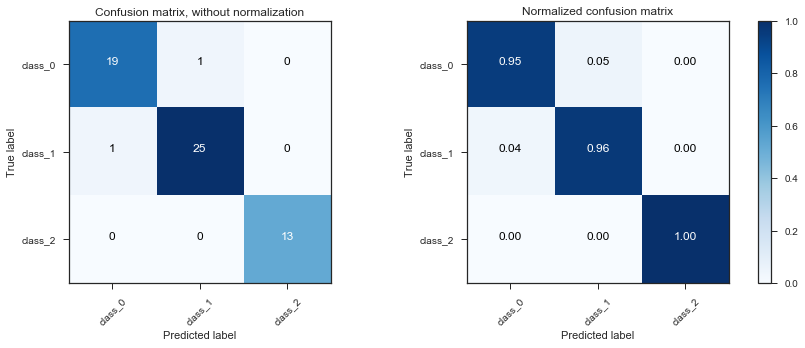

In [87]:
# Display the confusion matrices
# Issue a prediction 
y_pred = clf.predict(X_test)
display_confusion_matrices(y_test,y_pred)

#### Conclusion

The SVM model using a polynomial kernel is less performing and less accurate than when using the radial (rbf) kernel.

Compared to other models have seen earlier, it still looks competitive, with an F1 Score of 96.61% and an R² of about 93.78%.

Class 2 wine types are perfectly classified, but one class 1 as been considered being a class 0 and reciprocally.

The model does not fit completely the training set (F1 of 98.3%) still it does better than on the testing set (F1 of 96.6%).

### Assumption verification: Does the SVM Radial and Polynomial Classifiers do best than the Linear one? (6.6.4)

### Finding the best C (6.6.4.1)

In [88]:
# Reinitialise the problem
X = wine.data

# Standardize the data
X = StandardScaler().fit_transform(X)
df = pd.DataFrame(X, columns=wine.feature_names)
y = wine.target

# Train Test Split ... 
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state = 999)

optimal_f1 = []
for n in range(1, 100000,100):
    # Use a step of 100
    clf = SVC(kernel='linear', C=n)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    optimal_f1.append(f1_score(y_test, y_pred, average='weighted'))
    optimal_c = (optimal_f1.index(max(optimal_f1))) +1
print("The optimal C with the linear SVM is  " + str(optimal_c), 'and the best f1 score is ', max(optimal_f1))

The optimal C with the linear SVM is  1 and the best f1 score is  0.9313962873284907


It confirms what we thought ie. the radial and polynomial kernel do best as the data does not seem to be easily sliced linearly.

## Identifying the best model (7)

In [89]:
# Define the list of the models used
model1=LogisticRegression()
model2=KNeighborsClassifier(3,'distance')
model3=KNeighborsClassifier(20,'distance')
model4=KNeighborsClassifier(43)
model5=KNeighborsClassifier(95,'distance')
model6=DecisionTreeClassifier()
model7=GaussianNB()
model8=SVC(kernel='poly')
model9=SVC(kernel='rbf')

models = [model1,model2,model3,model4,model5,model6,model7,model8,model9]
models_names= ['Logistic Regression','KNN(2) Distance','KNN(20) Distance','KNN(43)','KNN(95) Distance','Decision Tree','Naive Bayes','SVC Polynomial','SVC Radial']
          
# Print to see if it works properly
print(models)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance'), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='distance'), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=43, p=2,
           weights='uniform'), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=95, p=2,
           weights='distance'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_dep

In [90]:
# Try to identity the best model, first we rank the models relatively to respective their precision, recall and F1 score
precision=[]
recall=[]
f1=[]

# Reinitialise the problem
X = wine.data

# Standardize the data
X = StandardScaler().fit_transform(X)
df = pd.DataFrame(X, columns=wine.feature_names)
y = wine.target

# Train Test Split ... 
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state = 999)

for model in models:
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    precision.append(precision_score(y_test, y_pred, average='weighted'))
    recall.append(recall_score(y_test, y_pred, average='weighted'))
    f1.append(f1_score(y_test, y_pred, average='weighted'))
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  [0.9681194511702986, 0.9425443906376111, 0.9534448602245211, 0.9691833590138674, 0.9838579499596449, 0.9155675398048279, 0.9838579499596449, 0.9661016949152542, 1.0]
Recall:  [0.9661016949152542, 0.9322033898305084, 0.9491525423728814, 0.9661016949152542, 0.9830508474576272, 0.9152542372881356, 0.9830508474576272, 0.9661016949152542, 1.0]
F1 Score:  [0.9659442989910124, 0.9322152689674179, 0.9487169632448083, 0.9662308313155771, 0.9830913762776711, 0.9142135498267104, 0.9830913762776711, 0.9661016949152542, 1.0]


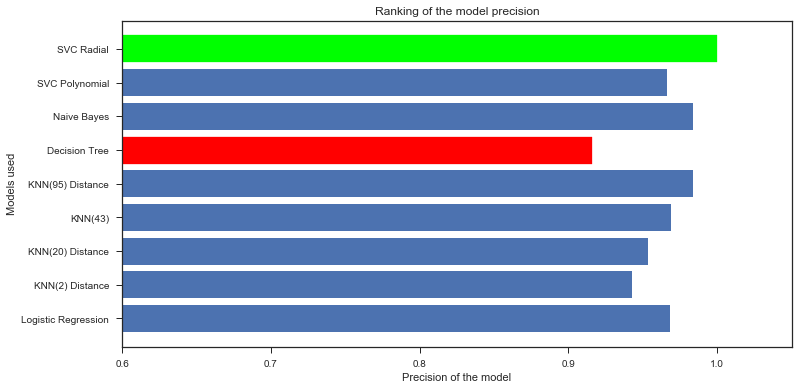

In [91]:
# plot the Bar Chart 
plt.figure(figsize=(12,6))
y_pos = np.arange(len(models_names))
plot_bar = plt.barh(y_pos,precision,align='center')

# Check where is the make in the list
max_index = precision.index(max(precision))
min_index = precision.index(min(precision))
plot_bar[max_index].set_color('lime')
plot_bar[min_index].set_color('red')

plt.xlim(.6)
plt.yticks(range(len(models_names)),models_names)
plt.xlabel('Precision of the model')
plt.ylabel('Models used')
plt.title('Ranking of the model precision');

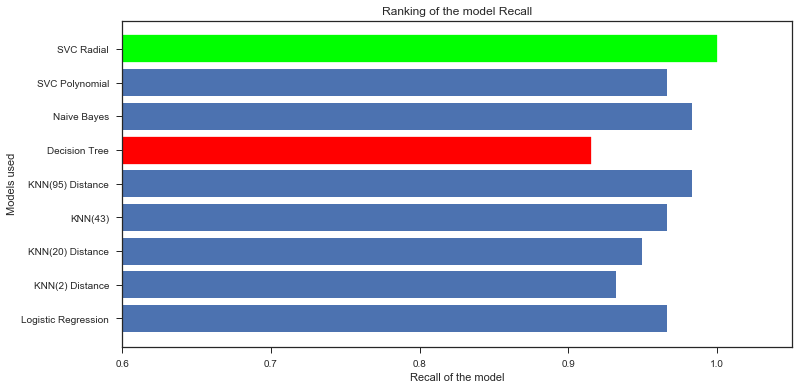

In [92]:
# plot the Bar Chart 
plt.figure(figsize=(12,6))
y_pos = np.arange(len(models_names))
plot_bar = plt.barh(y_pos,recall,align='center')

# Check where is the make in the list
max_index = recall.index(max(recall))
min_index = recall.index(min(recall))
plot_bar[max_index].set_color('lime')
plot_bar[min_index].set_color('red')

plt.xlim(.6)
plt.yticks(range(len(models_names)),models_names)
plt.xlabel('Recall of the model')
plt.ylabel('Models used')
plt.title('Ranking of the model Recall');

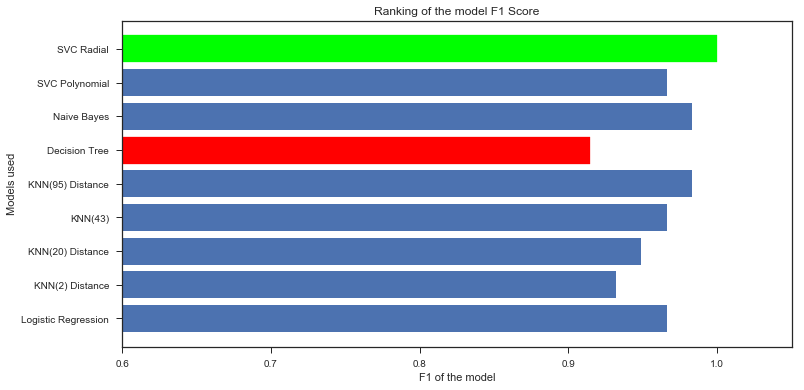

In [93]:
def models_ranking():
    # plot the Bar Chart 
    plt.figure(figsize=(12,6))
    y_pos = np.arange(len(models_names))
    plot_bar = plt.barh(y_pos,f1,align='center')

    # Check where is the make in the list
    max_index = f1.index(max(f1))
    min_index = f1.index(min(f1))
    plot_bar[max_index].set_color('lime')
    plot_bar[min_index].set_color('red')

    plt.xlim(.6)
    plt.yticks(range(len(models_names)),models_names)
    plt.xlabel('F1 of the model')
    plt.ylabel('Models used')
    plt.title('Ranking of the model F1 Score');

# Show the ranking according to the F1 score
models_ranking()

## Summary of the results (8)

Note that for each of the models tests/evaluations presented above, the data used has been standardized using the Standard Scaler method.

### About the important features 



#### General Remarks

None of the model with specific features selection does best than when all the data and features have been selected.

For the SVM Classifier, I chose to take radial and polynomial kernel, as the data seemed to be difficult to split linearly.

#### About features correlation amongst them

The observations were the following:
    
The flavanoids are very correlated with the total_phenols (0.86) and negatively correlated to the nonflavanoid_phenols (-0.54).

The nonflavanoid_phenols are negatively correlated to the total_phenolds (-0.45).

The proanthocyanins are correlated with the total_phenols (0.61) and to the flavanoids (0.65).
    
The proanthocyanins are almost not correlated with the ash nor the color_intensity. The color_intensity itself is not correlated with the total_phenols nor the alcalinity_of_ash.
    
The hue is slightly correlated to the total_phenols (0.43) and flavanoids (0.54) and negatively correlated to the malic_acid (-0.56) and the color_intensity (-0.52).
    
The od280/od315 is above all correlated to the total_phenols (0.7) and the flavanoids (0.79) and negatively correlated with the nonflavanoid_phenols (-0.5) and to the color_intensity (-0.52).

The proline is correlated to the alcohol (0.64) and negatively correlated to the alcalinity_of_ash (-0.44).

Remarkably the alcohol is in addition to the proline also correlated to the color_intensity (0.55) but not to other features.

#### Important Features for classification

From visual aspect, the following features scattered against other above seem to be of primary importance for classification.
By that I mean that the 3 different groups are more clearly clustered: 

The alcohol against od280/od315 and proline.

The color_intensity against the flavanoids and the total_phenols.

The proline against the alcohol, the total_phenols, the flavanoids, the color_intensity, the hue and the od280/315.

During the case I have chosen those features to see how the classification models deal with them (above all visually).

===============================================

The Extra Tree Classifier features importance results are quite reassuring since we find the same important features.

The proline, the alcohol, the od280/od315, the color_intensity and the flavanoids.

NB: the classification is not absolute and it must me remembered. It is just a ranking accordding to the Extra Tree Classifier. Different models will provide different classification.

===============================================

The Recursive Feature Elimination with the Logisitic Regression provides approximately the same results about what can be considered to be an important feature.

===============================================

Thanks to panda's parallel coordinate, I studied the clusters of points for each features in a multivariate setting.

Where the points that tend to cluster will appear closer together: it is like a profile of each class projected on each feature.

We observe that we have not a clear distinction for feature 2 (ash) nor for the feature 3 (alcalinity of ash) for the 3 classes.

On the contrary for the proline (feature 12), the differenciation of the class and the cluster of points in each class worth noticing.

===============================================

With Radviz we finally studied the dispersion of each profile amongst the features in a multivariate setting.

There is the conclusion:

That class 0, has a rather equilibrated profile (even more after the reduction of the number of features) and shows attraction to od280/315, proline and alcohol.

Class 1 and 2 are more spreaded (less clusterd) profiles amongst the feature.

Class 1 has a profile orientated towards od280/315, flavanoids, color_intensity and hue.

Class 2 has a profile more orientated towards alcohol, ash and the flavanoids.

### About the models used

#### All the Models Used (Recap)

The Logistic Regression model appeared to be quite efficient and powerful on our dataset when fitted with the training data.

Indeed, with a precision near 96.6% and a determination coefficient of 93.8% on the testing set, the model offers a F1 score of 96.6%. Not bad for a first try!

The Logistic regression completely fitted the in-sample training data with a R² of 1.

===============================================

K Nearest Neighbors

I found that the first maximum in term of the F1 score of the K nearest neighbors was when I used the parameter distance for K=95.

I have chosen the range of K to be tested to be 2, 30 and 95 to enlarge the spectrum of K being tested. (Always with the distance parameter). For each value of K, the model completely fits the training data in sample (R² of 1).

Regarding the K nearest neighbors model,as K increases, the precision, the recall and therefore F1 Score of our model on the testing set increase (F1 score from 93% for K=3 and then 95% for K=20 and finally near 98% for K=95 with the distance parameter).

With K=95, the average recall is of 98%, which even better to the logisitic regression model. The recall are respectively of 1, 0.96 and 1 for the class 0, 1 and 2 (one class 1 falsely attributed to a class 0). The R² is 96.90% the same with the regression classification model on the testing set.

Thefore with K=95, the K nearest neighbors model easily beats the logistic regression one and becomes the best model so far.

===============================================

The Decision Tree model looks a little bit less promising than the Logistic Regression and than the best KNN (K=95, 'distance').

The model fits like the two others the in sample training data perfectly. 

It is less accurate overall on the testing set with a R² of about 78% to 90%, and a F1 score of near 95% at best and 86/87% at worst: so in most of the cases tested, it has a lower F1 Score than the best models we have seen so far.

The metrics vary if you relaunch the script, and especially the recall concerning class 1 type.

Seems to be (for now) the worst model to use!

===============================================

On the contrary, the Naive Bayes model appears to be one of the most robust with the KNN (95, distance) !

Only one error is made (a class 1 being indentified as being a class 0).

The model does not perfectly fit the training data with a R² of 95.9% but surprisingly enough it provides a R² of 96.9% on the testing sample. We conclude that this model does better with the testing sample than the training sample. This model may not overfit too much the training in-sample data which may allows it to commit fewer mistakes on the testing set.

It has the best F1 score of 98.3% (recall and precision are almost similiar at 0.98) which ranks it as the best model with KNN (95) until now.

===============================================

Even better, the SVM Radial Classifier model (in fact it corresponds to the default parameters outshines the Naive Bayes model and the KNN (95) model, achieving a perfect classification of the type of class on the testing set (still fitted with the training set).

It has never happened with other models. The model also perfectly fit the training data in sample (R² of 1, F1 score of 1).

===============================================

The last model used was the SVM model using a polynomial kernel (using default parameters).

Actually this model is less performing and less accurate than when using the radial (rbf) kernel.

Compared to other models have seen earlier, it still looks competitive, with an F1 Score of 96.61% and an R² of about 93.78%.

Class 2 wine types are perfectly classified, but one class 1 as been considered being a class 0 and reciprocally.

The model does not fit completely the training set (F1 of 98.3%) still it does better than on the testing set (F1 of 96.6%).

===============================================

The SVC with a linear kernel (as expected) is less performing that using a radial or polynomial kernel.

#### The Best Model

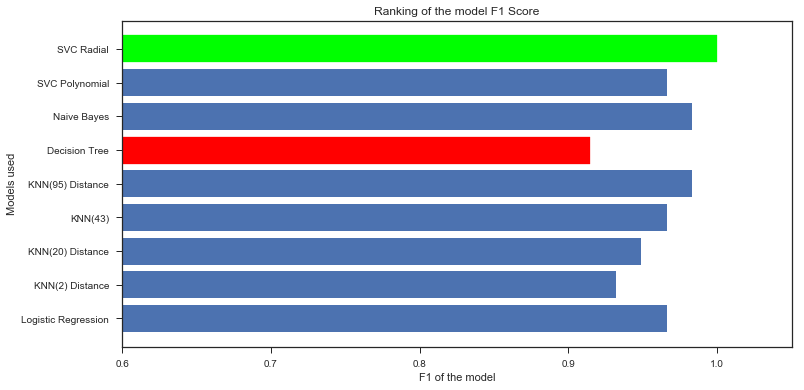

In [94]:
# Show the ranking according to the F1 score
models_ranking()

This is graphically the ranking of the best models used in this case study according to their F1 Score on the testing set.

This clearly indicates the best model: the SVC using radial kernel and the worst: the Decision Tree or the KNN (2) with a distance metric, depending on the out-of-sample testing results of the KNN(2) (if you relaunch the script).
        
We can notice the performance of the Naive Bayes one (rank 2) and of the KNN (95) with Distance parameter also (rank 2) and the similar score of the Logistic Regression, the KNN (43) and the SVC using a polynomial kernel. 

#### Last Remarks

The size of the data I had was pretty small: only 178 with at least 50 in each class of wine.

As a consequence even if those models seem to be very good to issue predictions once the data is standardized, they might not be so good at predicting (real) out-of-sample data. Indeed the Logistic Regression, the SVM (radial), KNN, Decision Tree Classifier ... seem to overfit the training data.

As an extension, I could have studied how the size of the training sample affected the f1 score of each of the models tested for instance.